In [1]:
import datetime as dt
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

from covid_19.plotting import plot_data, figsize
from covid_19 import simulate

In [2]:
# data
confirmed_cases = np.loadtxt('../data/confirmed_cases.dat')
recovered_cases = np.loadtxt('../data/recovered_cases.dat')
death_cases = np.loadtxt('../data/death_cases.dat')

# 1st wave
epidemics_start_date = dt.datetime(2020, 2, 26)

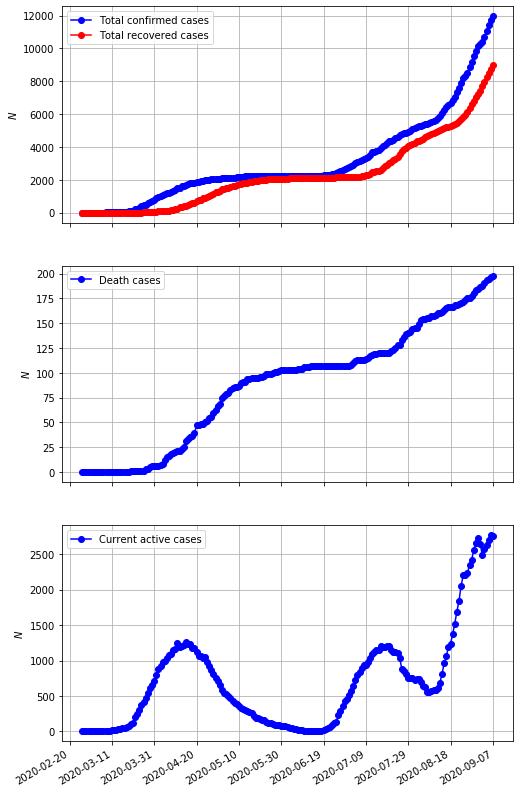

In [3]:
plot_data(
    epidemics_start_date, 
    confirmed_cases, 
    recovered_cases, 
    death_cases)

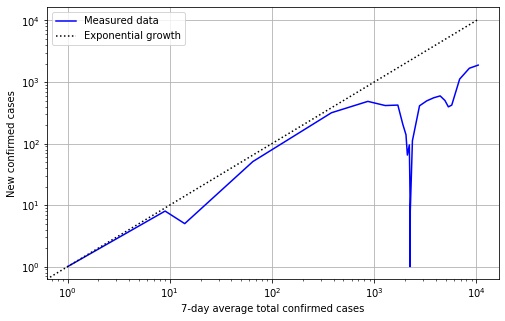

In [4]:
simulate.averaged_new_cases_v_total_cases(confirmed_cases)